In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from python_files.constants import PARTICIPANTS

In [4]:
df = pd.read_csv("./data/analysis/chat.csv", index_col=0)
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
df

,datetime,participant,type,message,edited,calls_meta,deleted,view_once
0,2024-02-16 20:13:00,Mariana,message,Oigan,False,False,False,False
1,2024-02-16 20:13:00,Mariana,message,Vengan a mi U,False,False,False,False
2,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
3,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
4,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
...,...,...,...,...,...,...,...,...
59100,2025-02-23 09:05:00,Mariana,message,"No, hinchazón",False,False,False,False
59101,2025-02-23 09:06:00,Mariana,message,Wow,False,False,False,False
59102,2025-02-23 09:06:00,Mariana,message,Buenos días,False,False,False,False
59103,2025-02-23 10:01:00,JuanD,message,Buenos días,False,False,False,False


## Conteo de mensajes

In [5]:
count_df = df.groupby("datetime").count()
count_df.reset_index(inplace=True)
count_df = count_df[["datetime", "message"]]
count_df

,datetime,message
0,2024-02-16 20:13:00,5
1,2024-02-16 20:14:00,2
2,2024-02-16 20:15:00,1
3,2024-02-16 20:18:00,2
4,2024-02-16 20:19:00,2
...,...,...
19036,2025-02-23 08:48:00,1
19037,2025-02-23 09:05:00,1
19038,2025-02-23 09:06:00,2
19039,2025-02-23 10:01:00,1


In [6]:
count_participant_df = df.groupby(["datetime", "participant"]).count()
count_participant_df.reset_index(inplace=True)
count_participant_df = count_participant_df[["datetime", "participant", "message"]]
count_participant_df

,datetime,participant,message
0,2024-02-16 20:13:00,Mariana,2
1,2024-02-16 20:13:00,Negron,3
2,2024-02-16 20:14:00,Hombre Religioso,2
3,2024-02-16 20:15:00,Mariana,1
4,2024-02-16 20:18:00,JuanD,2
...,...,...,...
29343,2025-02-23 08:48:00,Alana,1
29344,2025-02-23 09:05:00,Mariana,1
29345,2025-02-23 09:06:00,Mariana,2
29346,2025-02-23 10:01:00,JuanD,1


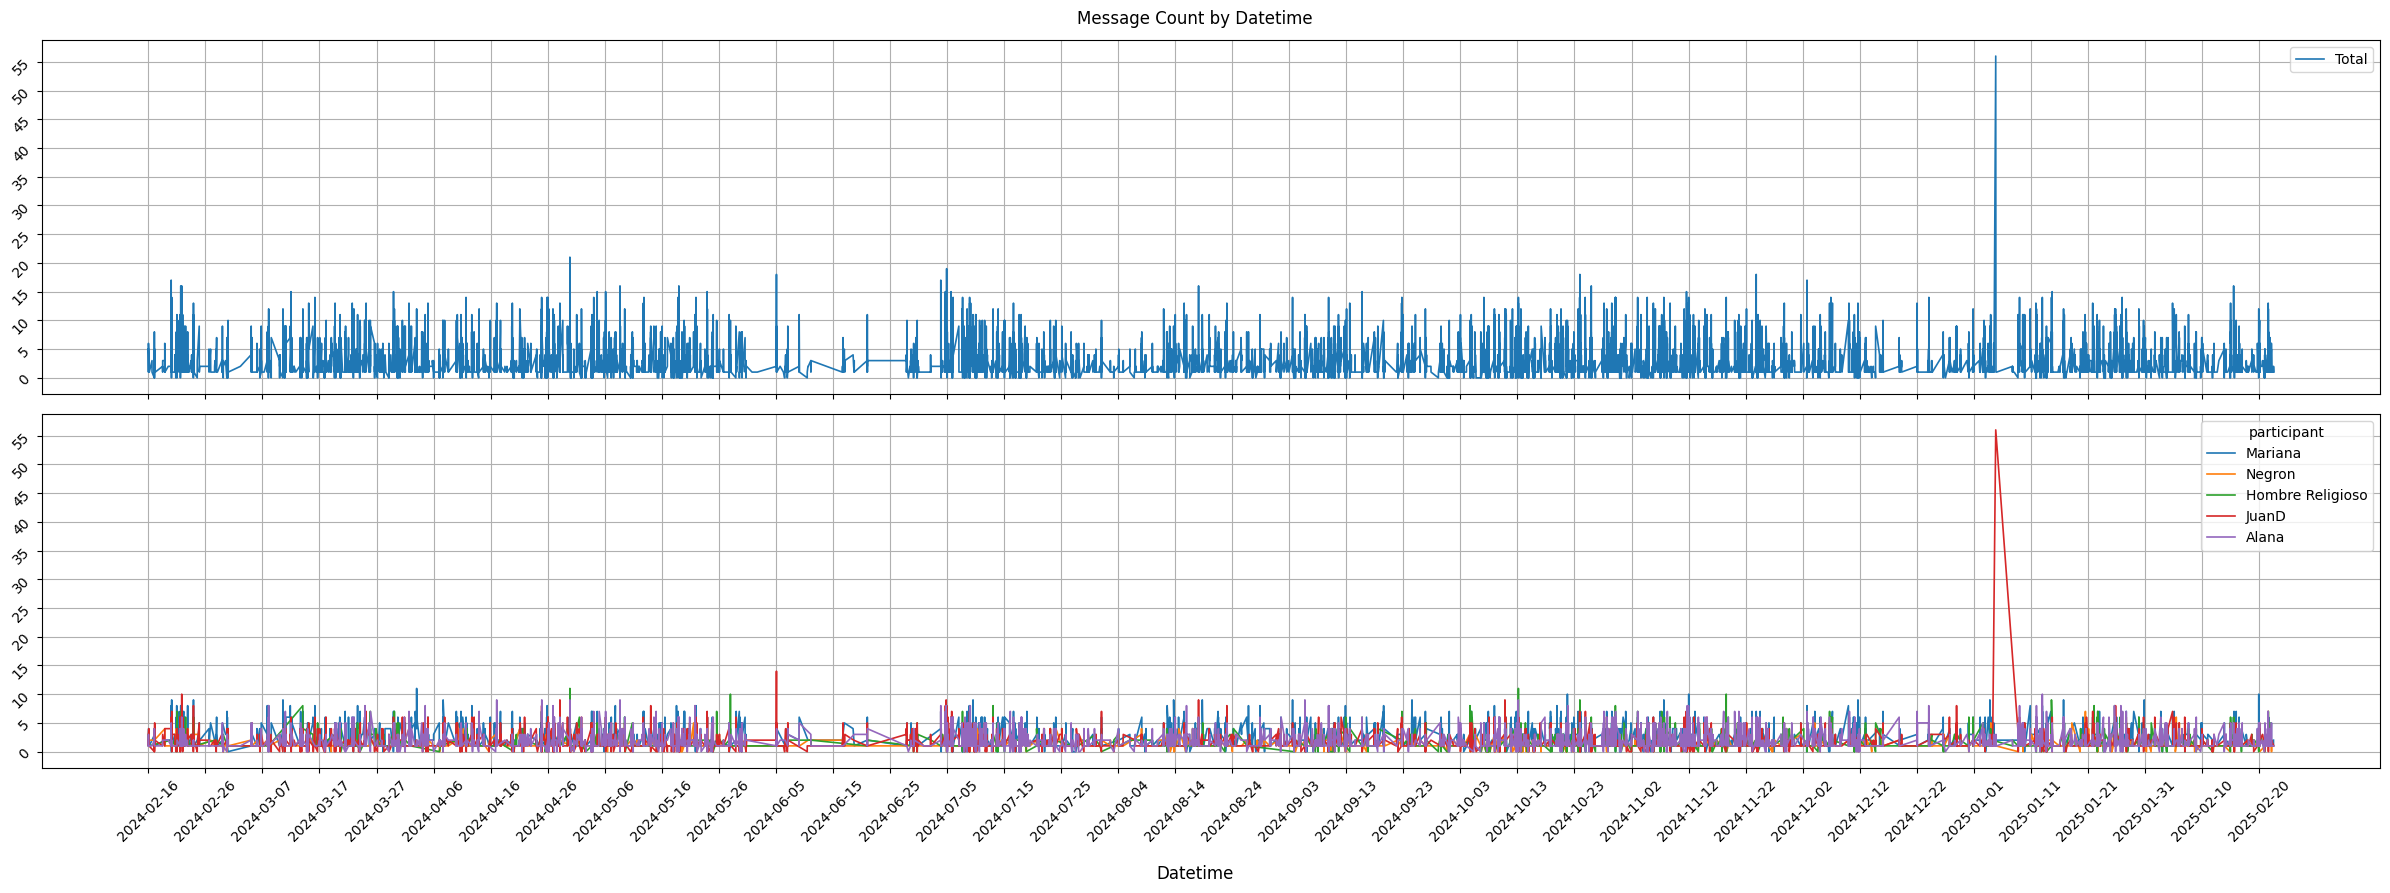

In [7]:
xticks = pd.date_range(start=count_df["datetime"].min(), end=count_df["datetime"].max(), freq='10D')
yticks = range(0, count_df["message"].max() + 1, 5)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(24, 9), sharex=True)

sns.lineplot(data=count_df, x="datetime", y="message", linewidth=1.2, label="Total", ax=ax1)
sns.lineplot(data=count_participant_df, x="datetime", y="message", hue="participant", linewidth=1.2, ax=ax2)

# Configuring first axes
ax1.set(xlabel="", ylabel="", yticks=yticks)
ax1.set_yticklabels(yticks, rotation=45)
ax1.grid()
ax1.legend()

# Configuring second axes
ax2.set(xlabel="", ylabel="", xticks=xticks, yticks=yticks)
ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
ax2.set_yticklabels(yticks, rotation=45)
ax2.grid()

# Configuring figure
fig.suptitle("Message Count by Datetime")
fig.supxlabel("Datetime")
fig.tight_layout()

plt.show()

In [8]:
# DataFrames para el promedio total y por participante por cada día
mean_total_df = pd.DataFrame(columns=["datetime", "total"])
mean_participant_df = pd.DataFrame(columns=["datetime", "participant", "total"])

# DataFrames para la suma total y por participante por cada día
sum_total_df = pd.DataFrame(columns=["datetime", "total"])
sum_participant_df = pd.DataFrame(columns=["datetime", "participant", "total"])

# Contadores
cont_total = 0
cont_participant = 0

# Inicializar las fechas de inicio y fin
start_date = count_df["datetime"].min()
end_date = count_df["datetime"].max()

# Quitar las horas de las fechas y agregar un día extra a la fecha final
start_date = start_date - pd.Timedelta(hours=start_date.hour, minutes=start_date.minute, seconds=start_date.second)
end_date = end_date - pd.Timedelta(hours=end_date.hour, minutes=end_date.minute, seconds=end_date.second) + pd.Timedelta(days=1)

# Crear un rango de fechas
date_range = pd.date_range(start=start_date, end=end_date, freq='1D')

for i in range(1, len(date_range)):
    date_interval = (date_range[i - 1], date_range[i])

    total_tmp_df = count_df[(count_df["datetime"] >= date_interval[0]) & (count_df["datetime"] < date_interval[1])]
    participant_tmp_df = count_participant_df[
        (count_participant_df["datetime"] >= date_interval[0]) &
        (count_participant_df["datetime"] < date_interval[1])
    ]

    total_tmp_df = total_tmp_df.groupby("datetime").sum().reset_index()[["datetime", "message"]]
    participant_tmp_df = participant_tmp_df.groupby(["datetime", "participant"]).sum().reset_index()[["datetime", "participant", "message"]]

    mean_total_df.loc[cont_total] = [date_interval[0], total_tmp_df["message"].mean()]
    sum_total_df.loc[cont_total] = [date_interval[0], total_tmp_df["message"].sum()]
    cont_total += 1

    for participant in PARTICIPANTS:
        mean_participant_df.loc[cont_participant] = [date_interval[0], participant, participant_tmp_df[participant_tmp_df["participant"] == participant]["message"].mean()]
        sum_participant_df.loc[cont_participant] = [date_interval[0], participant, participant_tmp_df[participant_tmp_df["participant"] == participant]["message"].sum()]
        cont_participant += 1

mean_total_df["datetime"] = pd.to_datetime(mean_total_df["datetime"], format="%Y-%m-%d")
mean_participant_df["datetime"] = pd.to_datetime(mean_participant_df["datetime"], format="%Y-%m-%d")

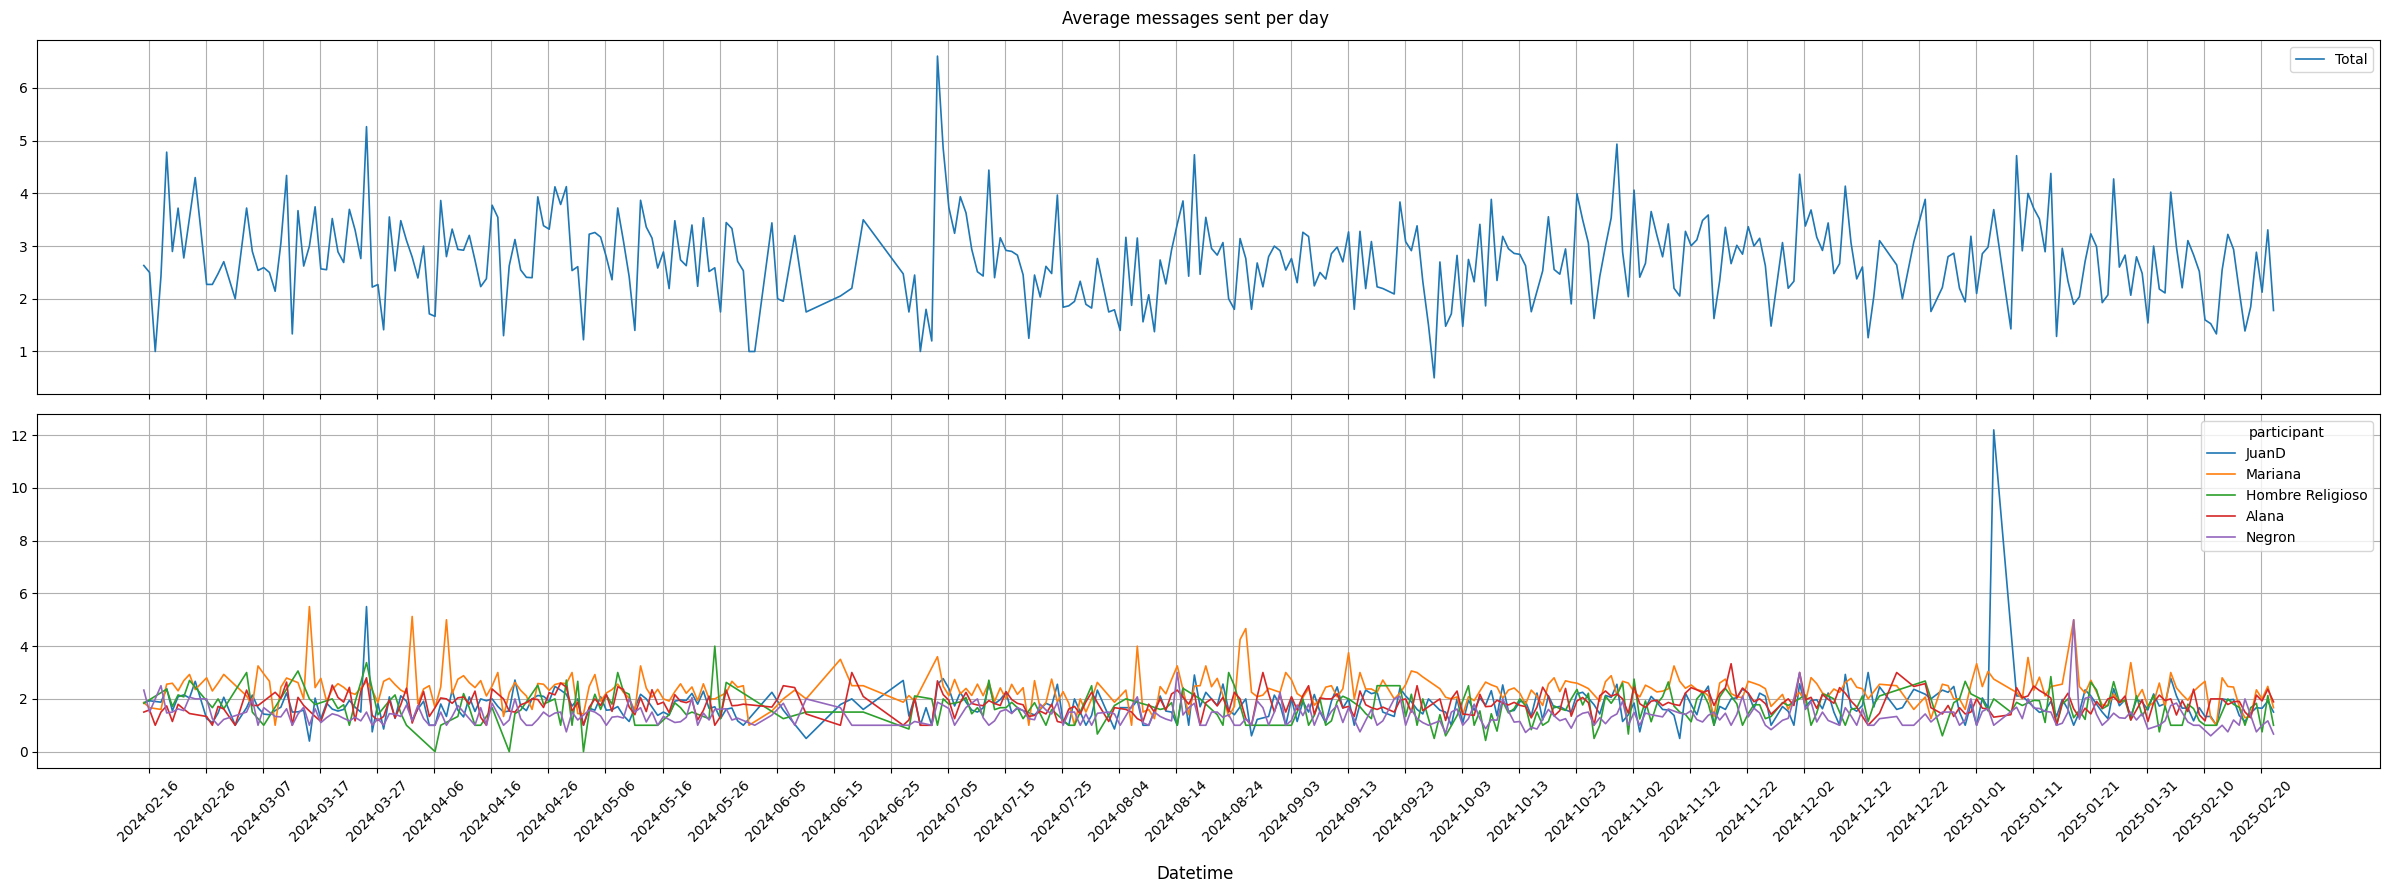

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(24, 9), sharex=True)

kwargs = {"linewidth": 1.2}

sns.lineplot(data=mean_total_df, x="datetime", y="total", label="Total", ax=ax1, **kwargs)
sns.lineplot(data=mean_participant_df, x="datetime", y="total", hue="participant", ax=ax2, **kwargs)

# Configuring first axes
ax1.set(xlabel="", ylabel="")
ax1.grid()
ax1.legend()

# Configuring second axes
ax2.set(xlabel="", ylabel="", xticks=xticks)
ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
ax2.grid()

# Configuring figure
fig.suptitle("Average messages sent per day")
fig.supxlabel("Datetime")
fig.tight_layout()
plt.show()

In [11]:
# Promedios generales

print(f"Promedio de mensajes totales enviados por día  ==>  {sum_total_df['total'].mean()} mensajes/día")

for participant in PARTICIPANTS:
    tmp_df = sum_participant_df[sum_participant_df["participant"] == participant]
    print(f"Media de mensajes totales enviados por: {participant}  ==>  {tmp_df['total'].mean()} mensajes/día")

Promedio de mensajes totales enviados por día  ==>  154.4385026737968 mensajes/día
Media de mensajes totales enviados por: JuanD  ==>  37.36363636363637 mensajes/día
Media de mensajes totales enviados por: Mariana  ==>  46.38770053475936 mensajes/día
Media de mensajes totales enviados por: Hombre Religioso  ==>  18.040106951871657 mensajes/día
Media de mensajes totales enviados por: Alana  ==>  38.32887700534759 mensajes/día
Media de mensajes totales enviados por: Negron  ==>  14.318181818181818 mensajes/día
